In [4]:
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.csv', header=None, delimiter=';')
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# select benign and malignant
y = df.iloc[0:100, 10].values
y = np.where(y == 2, 1, 0)

# extract Clump Thickness, Uniformity of Cell Size and Uniformity of Cell Shape
X = df.iloc[0:100, [1, 2, 3]].values

[1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]


/home/romuloht/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


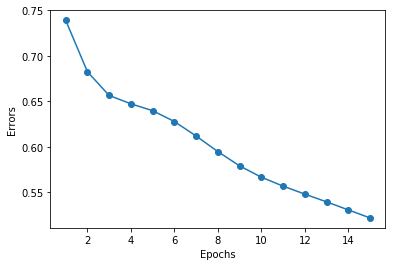

In [5]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(solver='sgd', learning_rate_init=0.01, max_iter=15)
mlpc.fit(X,y)

plt.plot(range(1, mlpc.n_iter_+1), mlpc.loss_curve_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.show()

/home/romuloht/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


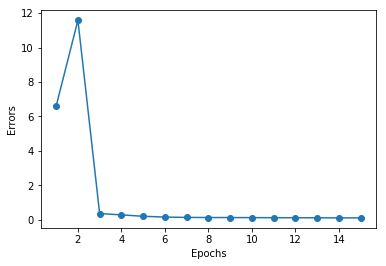

In [6]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(solver='sgd', learning_rate_init=0.01, max_iter=15)
mlpr.fit(X,y)

plt.plot(range(1, mlpr.n_iter_+1), mlpr.loss_curve_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.show()

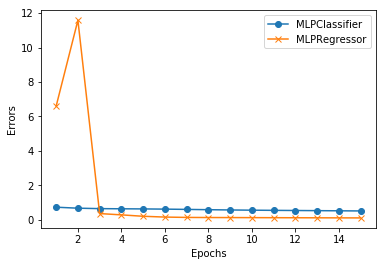

In [7]:
plt.plot(range(1, mlpc.n_iter_+1), mlpc.loss_curve_, marker='o', label='MLPClassifier')
plt.plot(range(1, mlpr.n_iter_+1), mlpr.loss_curve_, marker='x', label='MLPRegressor')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Errors')

plt.show()

/home/romuloht/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


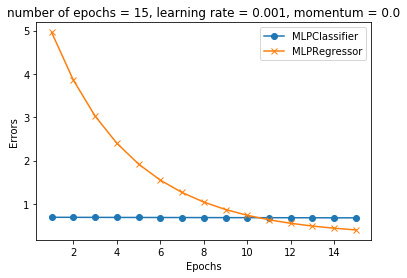

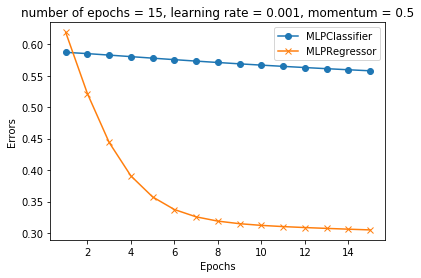

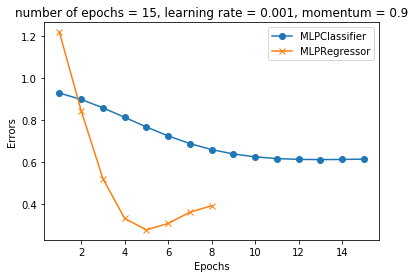

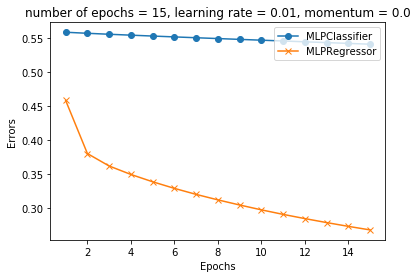

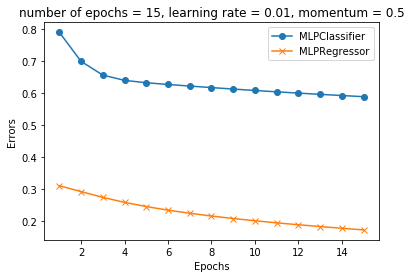

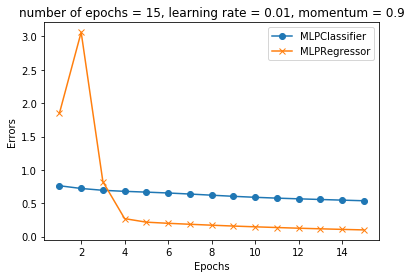

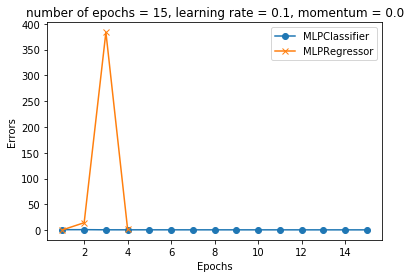

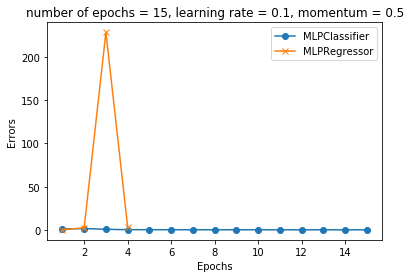

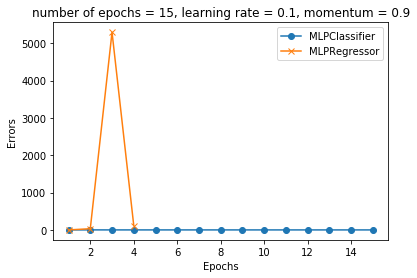

/home/romuloht/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


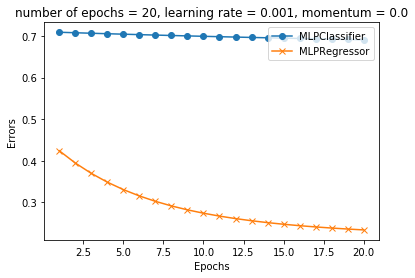

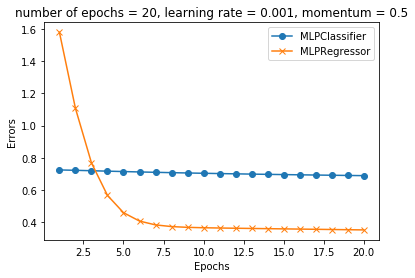

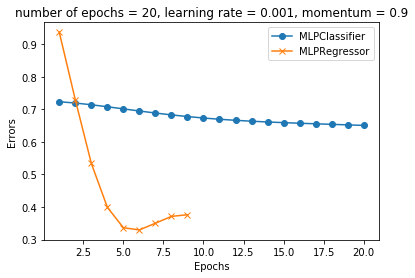

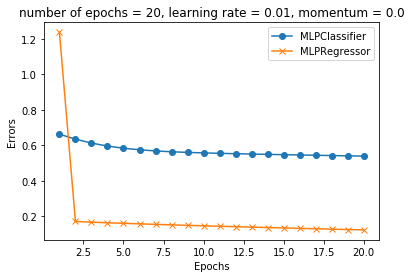

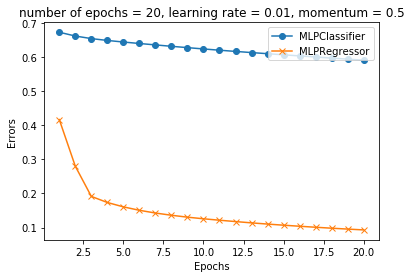

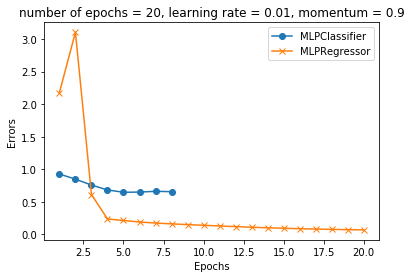

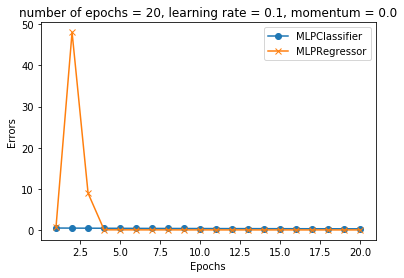

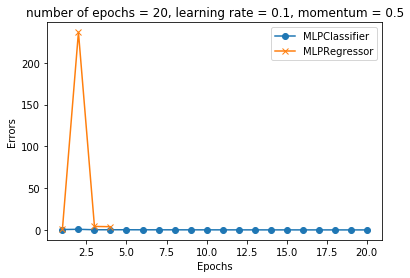

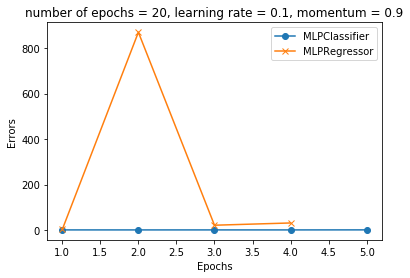

/home/romuloht/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


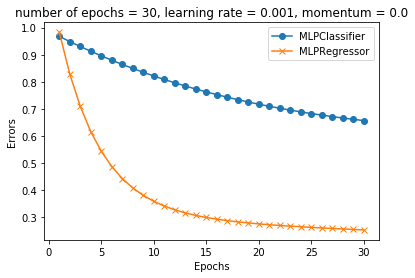

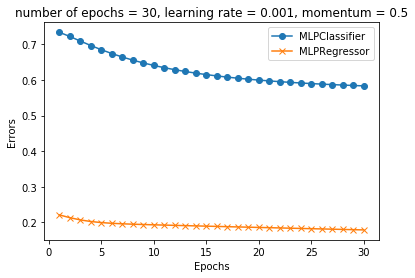

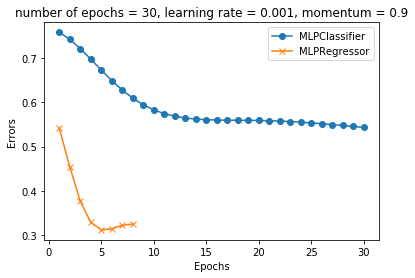

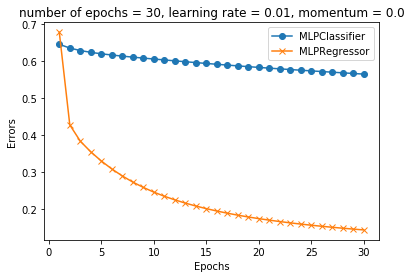

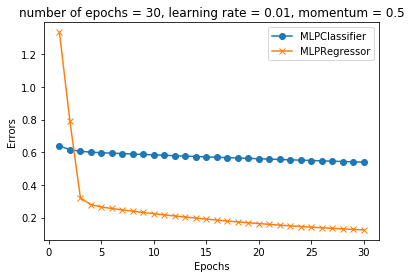

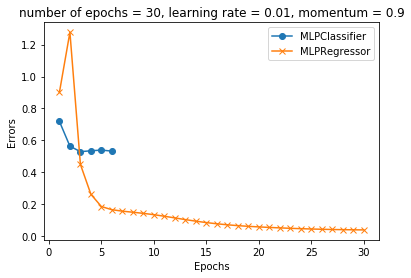

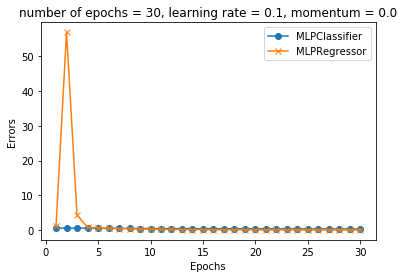

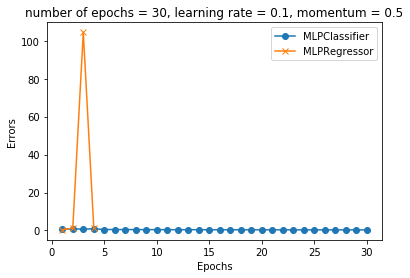

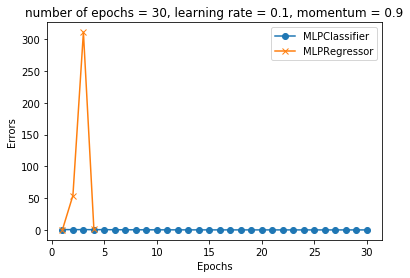

In [8]:
num_epochs = [15, 20, 30]
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

for epoch in num_epochs:
    for learn_rate in learning_rates:
        for moment in momentums:
            mlpc = MLPClassifier(solver='sgd', learning_rate_init=learn_rate, max_iter=epoch, momentum=moment)
            mlpc.fit(X,y)

            mlpr = MLPRegressor(solver='sgd', learning_rate_init=learn_rate, max_iter=epoch, momentum=moment)
            mlpr.fit(X,y)

            plt.plot(range(1, mlpc.n_iter_+1), mlpc.loss_curve_, marker='o', label='MLPClassifier')
            plt.plot(range(1, mlpr.n_iter_+1), mlpr.loss_curve_, marker='x', label='MLPRegressor')
            plt.legend(loc='upper right')
            plt.xlabel('Epochs')
            plt.ylabel('Errors')
            plt.title("number of epochs = "+str(epoch)+", learning rate = "+str(learn_rate)+", momentum = "+str(moment))

            plt.show()